![Deep Learning for Scientists in a hurry](./fig/Title.png)

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2023-07-24T23:08:32.437948-04:00

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.14.0

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 3.10.0-1160.24.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 52
Architecture: 64bit



In [3]:
import os
import time
start = time.time()
chapter_number = 1
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models
from torchvision import transforms
from PIL import Image
import torch

In [5]:
%watermark -iv

torch      : 2.1.0a0+4136153
torchvision: 0.16.0a0
numpy      : 1.22.2
PIL        : 9.2.0
matplotlib : 3.7.1



In [6]:
os.environ["TORCH_HOME"] = "./data"

---

# Using pre-trained networks (AlexNet and ResNet101)

Before learning how to build Deep Neural Networks, let's start an exploration with one of the most iconic networks, already trained and ready to be used, AlexNet.

AlexNet was the network that won the ImageNet Large Scale Visual Recognition Competition (ILSVRC) and revolutionized Deep Learning.

The paper is titled [ImageNet classification with deep convolutional neural networks](https://doi.org/10.1145/3065386) and the authors were Alex Krizhevsky, Ilya Sutskever, and Geoffrey E. Hinton.

![AlexNet1](./fig/AlexNet1.png)

![AlexNet2](./fig/AlexNet2.png)


ImageNet is a very large dataset with more than 14 million images and it is maintained by Stanford University.
Images on the dataset receive labels with a hierarchy of nouns coming from the [WordNet dataset](https://wordnet.princeton.edu). WordNet is a large list of words in the English language. WordNet contains nouns, verbs, adjectives, and adverbs and they are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. 



AlexNet was trained with a subset of the ImageNet dataset consisting on 1.2 million images labeled with one in 1000 nouns.

The result is a **function**, ie a map that receives one image and returns the probability for that image to receive each of the 1000 labels. The biggest value will be associated with most probable label the image will receive.

## The models available in PyTorch

PyTorch offers many Networks ready to use. The list is quite impressive:

In [7]:
index = 0
for iname in dir(models):
    if not iname.startswith('_'):
        print("%30s" % iname, end='')
        index += 1
    if index % 3 == 0:
        print('')

                       AlexNet               AlexNet_Weights                      ConvNeXt
         ConvNeXt_Base_Weights        ConvNeXt_Large_Weights        ConvNeXt_Small_Weights
         ConvNeXt_Tiny_Weights                      DenseNet           DenseNet121_Weights
           DenseNet161_Weights           DenseNet169_Weights           DenseNet201_Weights
                  EfficientNet       EfficientNet_B0_Weights       EfficientNet_B1_Weights
       EfficientNet_B2_Weights       EfficientNet_B3_Weights       EfficientNet_B4_Weights
       EfficientNet_B5_Weights       EfficientNet_B6_Weights       EfficientNet_B7_Weights
     EfficientNet_V2_L_Weights     EfficientNet_V2_M_Weights     EfficientNet_V2_S_Weights
                     GoogLeNet              GoogLeNetOutputs             GoogLeNet_Weights
                    Inception3              InceptionOutputs          Inception_V3_Weights
                       MNASNet            MNASNet0_5_Weights           MNASNet0_75_Weights

## Selecting `AlexNet`

We will choose `AlexNet` and download the pre-trained version of the network. The network is big so it takes a while. 

What we are downloading is not only the network but also all the weights and biases, including those for the convolutions that make the network perform as it was trained.

In [8]:
alexnet = models.AlexNet()
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

See the definition of this network and try to compare it with the figure above. Notice the numbers $11 \times 11$. Not all the numbers match and this network is quite complex. We will understand it much better later on.

In [9]:
!ls ./data/hub/checkpoints

alexnet-owt-4df8aa71.pth  resnet152-b121ed2d.pth  resnet34-333f7ec4.pth
resnet101-5d3b4d8f.pth	  resnet18-5c106cde.pth   resnet50-19c8e357.pth


In [10]:
import torchvision

In [11]:
major,minor = torchvision.version.__version__.split('.')[0:2]
major=int(major)
minor=int(minor)

In [12]:
if major==0 and minor < 13:
    alexnet = models.alexnet(pretrained=False)
else:
    alexnet = models.alexnet(weights=None)

weights = torch.load("./data/hub/checkpoints/alexnet-owt-4df8aa71.pth")

In [13]:
alexnet.load_state_dict(weights)

<All keys matched successfully>

## ResNet-101

ResNet-101 is another network from [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf). This network won the ImageNet classification, detection, and localization challenge in 2015.

ResNet is a family of powerful deep neural networks which has achieved remarkable performance results in the ILSVRC 2015 classification challenge. 
ResNet has outperformed generalization performance on other recognition tasks and won first place on ImageNet detection, ImageNet localization, COCO detection, and COCO segmentation in ILSVRC and COCO 2015 competitions. 

There are many variants of ResNet architecture i.e. same concept but with a different number of layers. 
We have ResNet-X where X indicates the number of layers. X could be 18, 34, 50, 101,152, 164, 1202

The name ResNet followed by a two or three-digit number simply implies the ResNet architecture with a certain number of neural network layers. 

|Residual Network Weights | Accuracy at 1 | Accuracy in first 5 | Number of params |
|---|---|---|---|
|ResNet18_Weights.IMAGENET1K_V1  | 69.758 | 89.078 | 11.7M |
|ResNet34_Weights.IMAGENET1K_V1  | 73.314 | 91.420 | 21.8M |
|ResNet50_Weights.IMAGENET1K_V1  | 76.130 | 92.862 | 25.6M |
|ResNet50_Weights.IMAGENET1K_V2  | 80.858 | 95.434 | 25.6M |
|ResNet101_Weights.IMAGENET1K_V1 | 77.374 | 93.546 | 44.5M |
|ResNet101_Weights.IMAGENET1K_V2 | 81.886 | 95.780 | 44.5M |
|ResNet152_Weights.IMAGENET1K_V1 | 78.312 | 94.046 | 60.2M |
|ResNet152_Weights.IMAGENET1K_V2 | 82.284 | 96.002 | 60.2M |


In [14]:
if major==0 and minor < 13:
    resnet_18 = models.resnet18(pretrained=False)
    resnet_34 = models.resnet34(pretrained=False)
    resnet_50 = models.resnet50(pretrained=False)
    resnet_101 = models.resnet101(pretrained=False)
    resnet_152 = models.resnet152(pretrained=False)
else:
    resnet_18 = models.resnet18(weights=None)
    resnet_34 = models.resnet34(weights=None)
    resnet_50 = models.resnet50(weights=None)
    resnet_101 = models.resnet101(weights=None)
    resnet_152 = models.resnet152(weights=None)

weights = torch.load("./data/hub/checkpoints/resnet101-5d3b4d8f.pth")
resnet_101.load_state_dict(weights)

<All keys matched successfully>

The network is quite complex. See the image above from the paper to get an idea of all the layers designed on the network.

In [15]:
resnet = resnet_101

## Loading an image

Let's start with one image of a Box Turtle, a beautiful turtle native to North America.

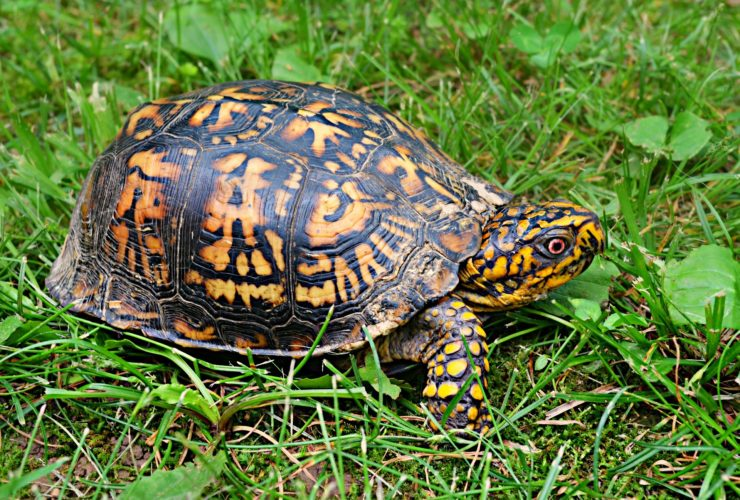

In [16]:
img = Image.open("./data/box-turtle-1389243_1920-740x500.jpg")
img

## Preprocessing the image

Images can have many sizes, a number of pixels in height and width, however, our network uses a very specific size $224 \times 224$.

This size is convenient because when using a $7 \times 7$ kernel we will get 32 blocks and the network continues in deeper layers using those values. 

Another point is that images use an integer number, 3 numbers in fact for each of the 3 colors; Red, Green, and Blue (RGB). Neural networks usually work better with small positive real numbers.

All this calls for a preprocessing of the image and we do that with `transforms`:

In [17]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

Using the preprocess object, we offer the image as an argument:

In [18]:
img_tensor = preprocess(img)
img_tensor

tensor([[[-0.3027, -0.3369, -0.3883,  ...,  0.5707,  0.5707,  0.4851],
         [-0.2856,  0.0227,  0.0398,  ...,  0.2453,  0.1254,  0.1426],
         [-0.2684,  0.1939,  0.2453,  ..., -0.0629, -0.2171, -0.1314],
         ...,
         [-0.9877, -1.4843, -0.3027,  ..., -0.8164, -0.6623, -1.0733],
         [-0.6794, -1.6727, -0.9877,  ..., -0.8678, -0.5253, -0.5767],
         [-0.2856, -1.4158, -1.3987,  ..., -1.2788, -1.0219, -0.7993]],

        [[ 0.1352,  0.1702,  0.2752,  ...,  0.9755,  1.0630,  1.1331],
         [ 0.1352,  0.4153,  0.5903,  ...,  0.9755,  0.9055,  0.9755],
         [ 0.2927,  0.6604,  0.7654,  ...,  0.8004,  0.6779,  0.7829],
         ...,
         [-0.5301, -1.2654, -0.3725,  ..., -0.6527, -0.6877, -1.1954],
         [-0.3375, -1.5105, -0.9853,  ..., -0.7402, -0.4601, -0.6001],
         [-0.1450, -1.4755, -1.2829,  ..., -1.0728, -0.8102, -0.6352]],

        [[-0.9504, -0.9853, -1.0201,  ..., -0.0964,  0.0256,  0.1302],
         [-0.9853, -0.6715, -0.6018,  ..., -0

We have a PyTorch tensor witch shape:

In [19]:
img_tensor.shape

torch.Size([3, 224, 224])

This tensor has $3 \times 224 \times 224$, that is one grid for each color. We can use the normalized tensor to plot image decomposed.

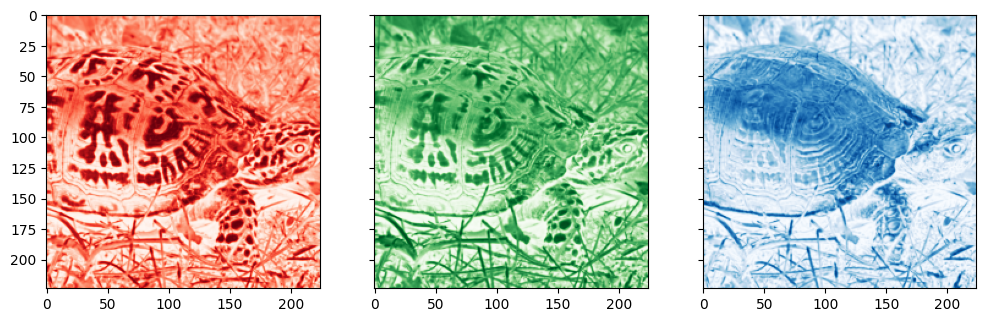

In [20]:
fig,axs = plt.subplots(1,3, sharey=True, figsize=(12,6))
axs[0].imshow(img_tensor[0],cmap='Reds')
axs[1].imshow(img_tensor[1],cmap='Greens')
axs[2].imshow(img_tensor[2],cmap='Blues');

## Creating a batch 

Models work with batches of inputs. We have just one image so we will create a batch from an image.
The method `unsqueeze` will add an extra dimension at the beginning of the array.

In [21]:
batch_tensor = torch.unsqueeze(img_tensor, 0)

In [22]:
batch_tensor.shape

torch.Size([1, 3, 224, 224])

In the PyTorch convention the input must follow the schema:
    
$\text{batch size} \times \text{channels} \times \text{pixel width} \times \text{pixels height}$

We have prepared the right tensor that we can feed for model evaluation

## Model Evaluation

Let's use resnet evaluated with the trained values

In [23]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

The `resnet` works like a function that receives as argument a batch and returns an output tensor.

In [24]:
out = resnet(batch_tensor)
out

tensor([[ 1.6901e+00,  2.3982e-01,  1.1894e-02, -2.2348e+00, -2.0660e-01,
          1.0620e+00,  5.4370e-01,  7.4792e-01,  4.9971e+00, -2.2809e+00,
          3.0217e+00,  1.1392e+00,  4.3333e-01,  5.1644e-01,  1.7300e-01,
          2.7832e-01, -1.9598e-01,  9.0995e-02, -6.6399e-01, -1.8919e+00,
          6.8382e-02,  7.9696e-01, -1.1228e+00, -4.5607e-01, -4.6579e-01,
          6.4502e+00,  4.2576e+00,  2.6728e+00,  5.2085e+00,  7.0499e-01,
          3.7547e+00,  7.4533e-02,  4.5858e+00,  5.9063e+00,  7.2183e+00,
          1.3005e+01,  1.3665e+01,  1.6048e+01,  3.3701e+00,  2.4279e+00,
         -4.9126e-01,  3.9300e+00,  2.1389e+00,  2.8791e+00,  2.8423e+00,
          4.0955e+00,  9.3219e-01,  1.9795e+00,  1.4636e+00,  3.0587e+00,
          3.8826e+00,  1.9524e+00,  2.3120e+00,  2.5039e+00,  3.0975e+00,
         -7.3481e-01,  3.6133e+00,  4.1476e+00,  2.4356e+00,  8.5387e-01,
          3.2501e+00,  1.1164e+00,  4.0918e+00,  2.2330e+00,  1.3093e+00,
          8.7573e-01,  1.7375e+00,  1.

In [25]:
out.shape

torch.Size([1, 1000])

This tensor contains unnormalized values for all the 1000 classes returned by `resnet`.

## Loading labels

In [26]:
with open('./data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [27]:
len(labels)

1000

## Identifying the image

In [28]:
_, index = torch.max(out, 1)

In [29]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('box turtle, box tortoise', 87.67369079589844)

In [30]:
_, indices = torch.sort(out, descending=True)

In [31]:
for idx in indices[0][:10]:
    print("{name:70s} Probability: {prob:8.5f}".format(name=labels[idx], prob=percentage[idx].item()))

box turtle, box tortoise                                               Probability: 87.67369
terrapin                                                               Probability:  8.08836
mud turtle                                                             Probability:  4.17762
leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea Probability:  0.01282
European fire salamander, Salamandra salamandra                        Probability:  0.00595
loggerhead, loggerhead turtle, Caretta caretta                         Probability:  0.00345
earthstar                                                              Probability:  0.00288
spotted salamander, Ambystoma maculatum                                Probability:  0.00172
hen                                                                    Probability:  0.00139
snail                                                                  Probability:  0.00123


# Exercises

1. Upload your image of an animal. Put the image on the "images" folder and execute the steps to identify the image using the pre-trained ResNet-101.

2. Search for an image with two animals, like a cat and a dog. What is the answer to the network?

---

# References

There are many books about Deep Learning and many more on Machine Learning. 
This list is by no means an exhaustive list of books. I am listing the books from which I took inspiration. Also, I am listing materials where I found better ways to present topics. Often I am amazed by how people can create approachable materials for seemingly dry subjects.

The order of the books goes from divulgation and practical to the more rigorous and mathematical. Slides, blogs, and videos are those I have found over the internet or suggested by others.

### Selection of Books on Deep Learning

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Kelleher" 
       src="./fig/books/Deep Learning - Kelleher.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      John D. Kelleher<br>
      2019<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Charniak" 
       src="./fig/books/Introduction to Deep Learning - Charniak.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Eugene Charniak<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Skansi" 
       src="./fig/books/Introduction to Deep Learning - Skansi.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Sandro Skansi<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Subramanian" 
       src="./fig/books/Deep Learning with PyTorch - Subramanian.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Vishnu Subramanian<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Stevens" 
       src="./fig/books/Deep Learning with PyTorch - Stevens.png" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Eli Stevens, Luca Artiga and Thomas Viehmann<br>
      2020<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with Python - Chollet" 
       src="./fig/books/Deep Learning with Python - Chollet.jpg" 
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with Python (Second Edition)<br>
      François Chollet<br>
      2021<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Patterson" 
       src="./fig/books/Deep Learning - Patterson.jpeg"
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning, a practitioner's approach<br>
      Josh Patterson and Adam Gibson<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Goodfellow" 
       src="./fig/books/Deep Learning - Goodfellow.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      Ian Goodfellow, Yoshua Bengio, and Aaron Courville<br>
      2016<br>
  </div>
</div>

### Interactive Books

  * [Dive into Deep Learning](https://d2l.ai/index.html)<br>
    Interactive deep learning book with code, math, and discussions<br> 
    Implemented with PyTorch, NumPy/MXNet, and TensorFlow<br>
    Adopted at 300 universities from 55 countries


### Slides

  * John Urbanic's ["Deep Learning in one Afternoon"](https://www.psc.edu/wp-content/uploads/2022/04/Deep-Learning.pdf)<br>
An excellent fast, condensed introduction to Deep Learning.<br>
John is a Parallel Computing Scientist at Pittsburgh Supercomputing Center

  * [Christopher Olah's Blog](http://colah.github.io) is very good. For example about [Back Propagation](http://colah.github.io/posts/2015-08-Backprop)

  * Adam W. Harley on his CMU page offers [An Interactive Node-Link Visualization of Convolutional Neural Networks](https://www.cs.cmu.edu/~aharley/vis/)



### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)
 
 * Aurelien Geron Hands-on Machine Learning with Scikit-learn 
   [First Edition](https://github.com/ageron/handson-ml) and
   [Second Edition](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)
 
 * [3Blue1Brown Youtube Channel](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
 
 ---

# Back of the Book

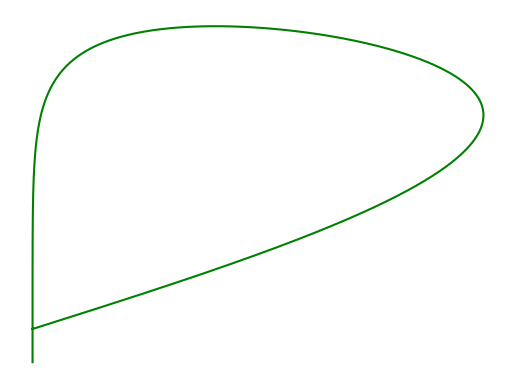

In [32]:
n = chapter_number
t = np.linspace(0, (2*(n-1)+1)*np.pi/2, 1000)
x = t*np.cos(t)**3
y = 9*t*np.sqrt(np.abs(np.cos(t))) + t*np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [33]:
end = time.time()
print(f'Chapter {chapter_number} took {int(end - start):d} seconds')

Chapter 1 took 7 seconds
